This code loads all the optIn and the optOut visits the crawler made into a dataframe and stores it into a pickle file.

In [1]:
from python.load_dataframe import load_dir
import pandas as pd

dir_optOut = "../data/final-data/opt-out/*.json"
dir_optIn = "../data/final-data/opt-in/*.json"

ignore_columns = ['testStarted', 'testFinished', 'timeout', 'screenshots', 'close']

df_optIn = load_dir(dir_optIn, ignore_columns)
df_optIn['autoconsent_action'] = 'optIn'
df_optOut = load_dir(dir_optOut, ignore_columns)
df_optOut['autoconsent_action'] = 'optOut'

df = pd.concat([df_optIn, df_optOut])
df.to_pickle('data/visits.pkl')

display(df)

,initialUrl,finalUrl,cmps,requests,cookies,apis,targets,autoconsent_action
0,http://tradplusad.com/,https://www.tradplusad.com/,cmps failed,"[{'url': 'http://tradplusad.com/', 'method': '...","[{'name': 'invite_query', 'domain': '.tradplus...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://tradplusad.co...",optIn
1,http://alexa.com/,https://alexa.com/,no cmps found,"[{'url': 'http://alexa.com/', 'method': 'GET',...",[],"{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://alexa.com/'}]",optIn
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,succeeded,"[{'url': 'http://bstatic.com/', 'method': 'GET...","[{'name': 'X-AB', 'domain': 'sc-static.net', '...",{'callStats': {'https://cf.bstatic.com/static/...,"[{'type': 'page', 'url': 'http://bstatic.com/'...",optIn
3,http://aniwatch.to/,https://aniwatch.to/,no cmps found,"[{'url': 'http://aniwatch.to/', 'method': 'GET...","[{'name': '_ga', 'domain': '.aniwatch.to', 'pa...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://aniwatch.to/'...",optIn
4,http://poste.it/,http://poste.it/,succeeded,"[{'url': 'http://poste.it/', 'method': 'GET', ...","[{'name': 'demdex', 'domain': '.demdex.net', '...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://poste.it/'}]",optIn
...,...,...,...,...,...,...,...,...
9614,http://westlaw.com/,https://signon.thomsonreuters.com/?productid=C...,no cmps found,"[{'url': 'http://westlaw.com/', 'method': 'GET...","[{'name': 'BIGipServerprod_apache_b', 'domain'...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://westlaw.com/'}]",optOut
9615,http://qortex.ai/,https://www.qortex.ai/,no cmps found,"[{'url': 'http://qortex.ai/', 'method': 'GET',...","[{'name': '__cf_bm', 'domain': '.vimeo.com', '...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://qortex.ai/'}]",optOut
9616,http://sothebys.com/,https://www.sothebys.com/en/,no cmps found,"[{'url': 'http://sothebys.com/', 'method': 'GE...","[{'name': 'test_cookie', 'domain': '.doublecli...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://sothebys.com/'}]",optOut
9617,http://mozilla.org/,https://www.mozilla.org/,no cmps found,"[{'url': 'http://mozilla.org/', 'method': 'GET...","[{'name': '_ga', 'domain': '.mozilla.org', 'pa...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://mozilla.org/'}]",optOut


This graph shows the success rates for cookie consent policy modes optIn and optOut.

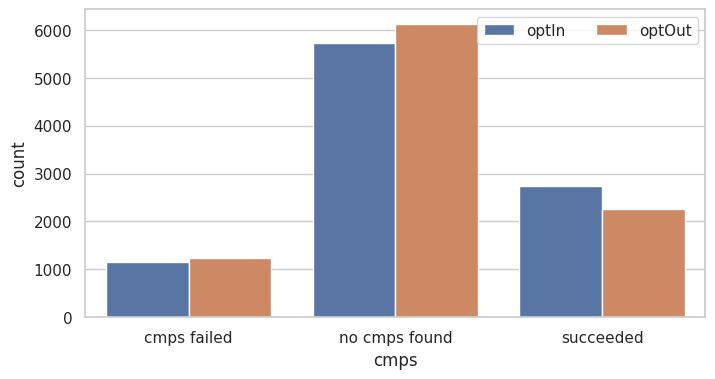

autoconsent_action  cmps         
optIn               no cmps found    5724
                    succeeded        2748
                    cmps failed      1150
optOut              no cmps found    6126
                    succeeded        2257
                    cmps failed      1236
Name: count, dtype: int64

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8,4))
sns.countplot(x="cmps", hue="autoconsent_action", data=df)
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

df.groupby(["autoconsent_action"]).cmps.value_counts()

In [3]:
import numpy as np
val = np.intersect1d(df_optIn['initialUrl'], df_optOut['initialUrl'])

df_intersection = df[df['initialUrl'].isin(val)]
df_intersection.to_pickle('data/intersection_of_visits.pkl')

In [4]:
display(df_intersection)

,initialUrl,finalUrl,cmps,requests,cookies,apis,targets,autoconsent_action
0,http://tradplusad.com/,https://www.tradplusad.com/,cmps failed,"[{'url': 'http://tradplusad.com/', 'method': '...","[{'name': 'invite_query', 'domain': '.tradplus...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://tradplusad.co...",optIn
1,http://alexa.com/,https://alexa.com/,no cmps found,"[{'url': 'http://alexa.com/', 'method': 'GET',...",[],"{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://alexa.com/'}]",optIn
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,succeeded,"[{'url': 'http://bstatic.com/', 'method': 'GET...","[{'name': 'X-AB', 'domain': 'sc-static.net', '...",{'callStats': {'https://cf.bstatic.com/static/...,"[{'type': 'page', 'url': 'http://bstatic.com/'...",optIn
3,http://aniwatch.to/,https://aniwatch.to/,no cmps found,"[{'url': 'http://aniwatch.to/', 'method': 'GET...","[{'name': '_ga', 'domain': '.aniwatch.to', 'pa...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://aniwatch.to/'...",optIn
4,http://poste.it/,http://poste.it/,succeeded,"[{'url': 'http://poste.it/', 'method': 'GET', ...","[{'name': 'demdex', 'domain': '.demdex.net', '...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://poste.it/'}]",optIn
...,...,...,...,...,...,...,...,...
9614,http://westlaw.com/,https://signon.thomsonreuters.com/?productid=C...,no cmps found,"[{'url': 'http://westlaw.com/', 'method': 'GET...","[{'name': 'BIGipServerprod_apache_b', 'domain'...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://westlaw.com/'}]",optOut
9615,http://qortex.ai/,https://www.qortex.ai/,no cmps found,"[{'url': 'http://qortex.ai/', 'method': 'GET',...","[{'name': '__cf_bm', 'domain': '.vimeo.com', '...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://qortex.ai/'}]",optOut
9616,http://sothebys.com/,https://www.sothebys.com/en/,no cmps found,"[{'url': 'http://sothebys.com/', 'method': 'GE...","[{'name': 'test_cookie', 'domain': '.doublecli...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://sothebys.com/'}]",optOut
9617,http://mozilla.org/,https://www.mozilla.org/,no cmps found,"[{'url': 'http://mozilla.org/', 'method': 'GET...","[{'name': '_ga', 'domain': '.mozilla.org', 'pa...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://mozilla.org/'}]",optOut


In [6]:
visits = {
    'optIn': len(df_optIn),
    'optOut': len(df_optOut),
    'intersection': len(val),
}
print(visits)

{'optIn': 9622, 'optOut': 9619, 'intersection': 9563}
